<a href="https://www.kaggle.com/code/alpy18/eda-feature-engineering-telco-customer-churn?scriptVersionId=113818629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# İş Problemi
Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli
geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi
ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Veri Seti Hikayesi
Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali
bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu
gösterir.

# Değişkenler

Değişken | Açıklama
---|---
CustomerId | Müşteri İd’si
Gender | Cinsiyet
SeniorCitizen | Müşterinin yaşlı olup olmadığı (1, 0)
Partner | Müşterinin bir ortağı olup olmadığı (Evet, Hayır)
Dependents | Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır
tenure | Müşterinin şirkette kaldığı ay sayısı
PhoneService | Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
MultipleLines | Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
InternetService | Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
OnlineSecurity | Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
OnlineBackup | Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
DeviceProtection | Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
TechSupport | Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
StreamingTV | Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
StreamingMovies | Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
Contract | Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
PaperlessBilling | Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
PaymentMethod | Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
MonthlyCharges | Müşteriden aylık olarak tahsil edilen tutar
TotalCharges | Müşteriden tahsil edilen toplam tutar
Churn | Müşterinin kullanıp kullanmadığı (Evet veya Hayır)

**Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [3]:
# Veri setine genel bir bakış için bir fonksiyon oluşturduk ve kullandık.

def info_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n\n##################### Types #####################")
    print(dataframe.dtypes)
    print("\n\n##################### Head #####################")
    print(dataframe.head())
    print("\n\n##################### Tail #####################")
    print(dataframe.tail())
    print("\n\n##################### NA #####################")
    print(dataframe.isnull().sum())
    print("\n\n##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

info_df(df)

##################### Shape #####################
(7043, 21)


##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Y

In [4]:
# Değişkenlerin veri tiplerine baktığımızda TotalCharges değişkeninin 
# object tipinde olduğu görünüyor.
# Bunun için bir düzeltme yaptık.

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [5]:
# Aşağıdakı fonksiyon bize kategorik, numerik ve kardinal değişkenleri
# return ediyor ve genel bir bilgi veriyor.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtype) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtype in ["int64", "float64", "int32", "float32"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtype) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64", "float64", "int32", "float32"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [6]:
# Kategorik değişken analizi

def cat_summary(dataframe, cat_lst, plot=False):
    print("####################################################\n")
    for col in cat_lst:
        if dataframe[col].dtype == "bool":
            dataframe[col] = dataframe[col].astype(int)

        print(pd.DataFrame({col: dataframe[col].value_counts(),
                            "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}))
        print("\n####################################################\n")

        if plot:
            sns.countplot(x=dataframe[col], data=dataframe)
            plt.show(block=True)
        
cat_summary(df, cat_cols)

####################################################

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435

####################################################

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328

####################################################

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824

####################################################

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374

####################################################

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374

####################################################

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903

##########################

In [7]:
# Numerik değişken analizi

def num_summary(dataframe, num_lst, plot=False):
    print("#########################\n")
    for col in num_lst:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
        print(dataframe[col].describe(quantiles).T)
        print("\n#########################\n")
        if plot:
            dataframe[col].hist()
            plt.xlabel(col)
            plt.title(col)
            plt.show(block=True)
            
num_summary(df, num_cols)

#########################

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64

#########################

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64

#########################

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       2

In [8]:
# Hedef değişkenin sayısal olarak encode edilmesi

df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
df["Churn"].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [9]:
# Hedef değişkenin kategorik değişkenlerle analizi

def target_summary_with_cat(dataframe, target, cat_lst):
    print("############################################\n")
    for col in cat_lst:
        print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(col)[target].mean()}))
        print("\n############################################\n")
        
target_summary_with_cat(df, "Churn", cat_cols)

############################################

        TARGET_MEAN
gender             
Female     0.269209
Male       0.261603

############################################

         TARGET_MEAN
Partner             
No          0.329580
Yes         0.196649

############################################

            TARGET_MEAN
Dependents             
No             0.312791
Yes            0.154502

############################################

              TARGET_MEAN
PhoneService             
No               0.249267
Yes              0.267096

############################################

                  TARGET_MEAN
MultipleLines                
No                   0.250442
No phone service     0.249267
Yes                  0.286099

############################################

                 TARGET_MEAN
InternetService             
DSL                 0.189591
Fiber optic         0.418928
No                  0.074050

############################################

             

In [10]:
# Hedef değişkenin numerik değişkenlerle analizi

def target_summary_with_num(dataframe, target, num_lst):
    print("\n############################################\n")
    for col in num_lst:
        print(dataframe.groupby(target).agg({col: "mean"}))
        print("\n############################################\n")
        
target_summary_with_num(df, "Churn", num_cols)


############################################

          tenure
Churn           
0      37.569965
1      17.979133

############################################

       MonthlyCharges
Churn                
0           61.265124
1           74.441332

############################################

       TotalCharges
Churn              
0       2555.344141
1       1531.796094

############################################



In [11]:
# Aykırı gözlem analizi

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col)
    print(f"Outlier Thresholds: {outlier_thresholds(df, col)}")
    print(f"Any outlier?: {check_outlier(df, col)}")
    print("\n#############################\n")

tenure
Outlier Thresholds: (-60.0, 124.0)
Any outlier?: False

#############################

MonthlyCharges
Outlier Thresholds: (-46.02499999999999, 171.375)
Any outlier?: False

#############################

TotalCharges
Outlier Thresholds: (-4688.481250000001, 8884.66875)
Any outlier?: False

#############################



In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# Eksik gözlem analizi

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
missing_values_table(df)

              n_miss  ratio
TotalCharges      11   0.16


In [14]:
# Korelasyon analizi

df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


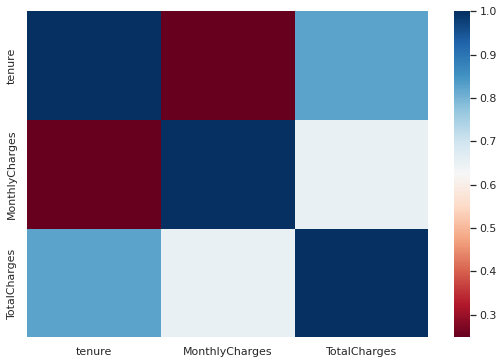

In [15]:
sns.set(rc={'figure.figsize': (9, 6)})
sns.heatmap(df[num_cols].corr(), cmap="RdBu")
plt.show()

# Feature Engineering

**Eksik Gözlemlerin Giderilmesi**

In [16]:
missing_values_table(df)

              n_miss  ratio
TotalCharges      11   0.16


In [17]:
# Oluşan eksik değerlerin yeni müşterilerden kaynaklandığını düşünerek
# bu boş gözlemlere 0 değerini atıyoruz.

df["TotalCharges"].fillna(0, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Yeni Değişkenlerin Oluşturulması**

In [18]:
df.loc[((df["Partner"] == "No") & (df["Dependents"] == "No")), "isAlone" ] = "Yes"
df.loc[~((df["Partner"] == "No") & (df["Dependents"] == "No")), "isAlone" ] = "No"

In [19]:
df.loc[(df["gender"] == "Female") & (df["SeniorCitizen"] == 1), "GenderByMaturity"] = "Old females"
df.loc[(df["gender"] == "Male") & (df["SeniorCitizen"] == 1), "GenderByMaturity"] = "Old males"
df.loc[(df["gender"] == "Female") & (df["SeniorCitizen"] == 0), "GenderByMaturity"] = "Young females"
df.loc[(df["gender"] == "Male") & (df["SeniorCitizen"] == 0), "GenderByMaturity"] = "Young males"

In [20]:
df.loc[((df["OnlineSecurity"] == "Yes") | (df["OnlineBackup"] == "Yes") | (df["DeviceProtection"] == "Yes") | (df["TechSupport"] == "Yes")), "AnyProtection"] = "Yes"
df.loc[~((df["OnlineSecurity"] == "Yes") | (df["OnlineBackup"] == "Yes") | (df["DeviceProtection"] == "Yes") | (df["TechSupport"] == "Yes")), "AnyProtection"] = "No"

In [21]:
df.loc[((df["StreamingTV"] == "Yes") | (df["StreamingMovies"] == "Yes")), "AnyStreaming"] = "Yes"
df.loc[~((df["StreamingTV"] == "Yes") | (df["StreamingMovies"] == "Yes")), "AnyStreaming"] = "No"

In [22]:
df.loc[(df["Contract"] == "Month-to-month"), "isLongTerm"] = "No"
df.loc[~(df["Contract"] == "Month-to-month"), "isLongTerm"] = "Yes"

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,isAlone,GenderByMaturity,AnyProtection,AnyStreaming,isLongTerm
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No,Young females,Yes,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Yes,Young males,Yes,No,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes,Young males,Yes,No,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Yes,Young males,Yes,No,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes,Young females,No,No,No


**Encoding İşlemleri**

In [24]:
# İki sınıflı kategorik değişkenlerin encode edilmesi

def select_binary_cols(dataframe):
    return [col for col in dataframe.columns if dataframe[col].dtype not in [int, float] 
            and dataframe[col].nunique() == 2]

def label_encoder(dataframe):
    binary_cols = select_binary_cols(dataframe)
    labelencoder = LabelEncoder()
    for col in binary_cols:
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

label_encoder(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,isAlone,GenderByMaturity,AnyProtection,AnyStreaming,isLongTerm
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,Young females,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,Young males,1,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,Young males,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,Young males,1,0,1
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,Young females,0,0,0


In [25]:
# Kategorik değişkenlerdeki nadir sınıfların yakalanması

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
        
rare_analyser(df, "Churn", cat_cols)

gender : 2
   COUNT     RATIO  TARGET_MEAN
0   3488  0.495244     0.269209
1   3555  0.504756     0.261603


Partner : 2
   COUNT     RATIO  TARGET_MEAN
0   3641  0.516967     0.329580
1   3402  0.483033     0.196649


Dependents : 2
   COUNT     RATIO  TARGET_MEAN
0   4933  0.700412     0.312791
1   2110  0.299588     0.154502


PhoneService : 2
   COUNT     RATIO  TARGET_MEAN
0    682  0.096834     0.249267
1   6361  0.903166     0.267096


MultipleLines : 3
                  COUNT     RATIO  TARGET_MEAN
No                 3390  0.481329     0.250442
No phone service    682  0.096834     0.249267
Yes                2971  0.421837     0.286099


InternetService : 3
             COUNT     RATIO  TARGET_MEAN
DSL           2421  0.343746     0.189591
Fiber optic   3096  0.439585     0.418928
No            1526  0.216669     0.074050


OnlineSecurity : 3
                     COUNT     RATIO  TARGET_MEAN
No                    3498  0.496663     0.417667
No internet service   1526  0.216669

In [26]:
# 2'den fazla sınıfı olan kategorik değişkenlerin encode edilmesi

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,isAlone,AnyProtection,AnyStreaming,isLongTerm,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,GenderByMaturity_Old females,GenderByMaturity_Old males,GenderByMaturity_Young females,GenderByMaturity_Young males
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


**Numerik Değişkenler için Standartlaştırma**

In [27]:
df[num_cols] = StandardScaler().fit_transform(df[num_cols])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,isAlone,AnyProtection,AnyStreaming,isLongTerm,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,GenderByMaturity_Old females,GenderByMaturity_Old males,GenderByMaturity_Young females,GenderByMaturity_Young males
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,9237-HQITU,0,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


**Model Oluşturma**

In [28]:
y = df["Churn"]
X = df.drop(["customerID", "Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy_score(y_pred, y_test)

0.7770941788925698

**Feature Importance**

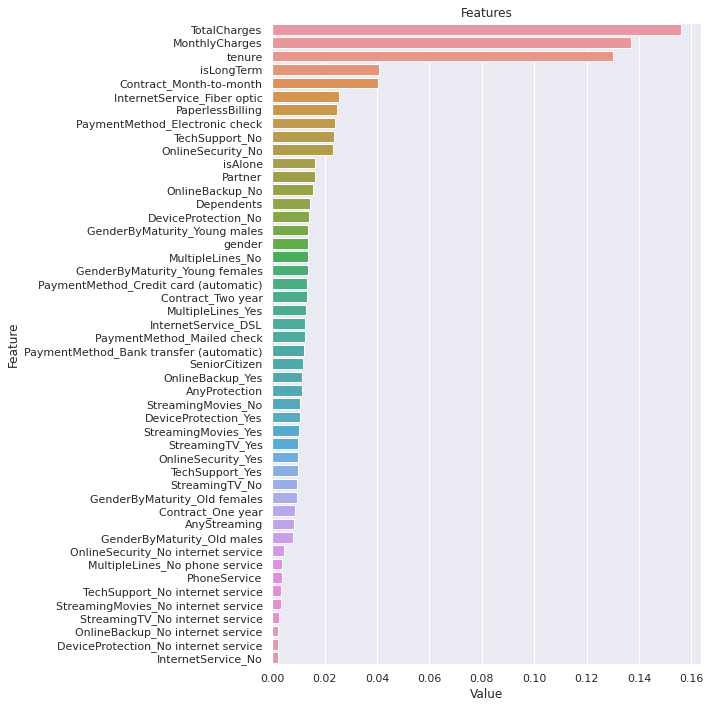

In [29]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')
        
plot_importance(rf_model, X_train)